In [1]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.151429,0.258365,-0.263884,-0.565645,-0.237093,-0.031528,-0.020133,0.360839,0.233641,0.434349,...,-0.121167,-0.218957,-0.017538,-0.028611,0.490808,0.279222,0.031294,0.189731,5512.811161,1
1,0.516965,-0.003606,0.080580,0.000322,0.206693,-0.153975,-0.379072,0.109077,0.130631,-0.138215,...,0.243706,0.159740,-0.052278,-0.165217,-0.443427,0.365473,0.250335,0.218105,7497.804822,1
2,-0.368370,-0.348251,0.056940,0.507942,-0.177608,-0.081400,-0.273522,0.266300,-0.144905,0.133951,...,0.170604,-0.177774,-0.277493,-0.683265,0.241084,0.090493,-0.412680,-0.289275,9793.376546,1
3,-0.072930,0.367488,-0.012641,0.448725,-0.042614,0.033307,-0.422715,-0.130242,0.031722,0.046920,...,0.131080,0.019161,-0.386626,-0.031560,0.475198,-0.029872,-0.698688,0.297954,0.000000,0
4,-0.146393,-0.470076,-0.018483,0.576773,0.212868,-0.015693,-0.524689,0.348708,-0.005045,0.094309,...,-0.020836,0.234705,0.121186,0.406273,0.284818,0.146024,0.358280,0.207074,0.000000,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,...,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000,774200.000000
mean,0.000090,-0.000342,0.000042,-0.000248,0.000273,0.000047,0.000720,-0.000104,-0.000119,-0.000562,...,0.000202,0.000070,-0.000482,0.000399,0.000726,-0.000517,-0.000103,0.000480,1407.102583,0.552166
std,0.367706,0.216147,0.089115,0.368335,0.216309,0.089178,0.367934,0.216252,0.089123,0.363592,...,0.318644,0.303901,0.311198,0.316621,0.304094,0.305850,0.313775,0.312943,2720.137317,0.497272
min,-1.036317,-0.715028,-0.555219,-1.036317,-0.731886,-0.563361,-1.013982,-0.746670,-0.563361,-1.005454,...,-1.233539,-1.187990,-1.112921,-1.157308,-1.122899,-1.149209,-1.182042,-1.235163,0.000000,0.000000
25%,-0.312146,-0.159262,-0.042141,-0.313427,-0.159158,-0.042085,-0.311854,-0.159371,-0.042213,-0.307464,...,-0.227446,-0.185511,-0.227791,-0.225238,-0.186689,-0.222217,-0.222184,-0.203958,0.000000,0.000000
50%,-0.000256,-0.000341,0.000017,0.000286,0.000369,0.000013,0.000050,-0.000276,-0.000011,-0.000625,...,0.000058,0.000035,-0.000687,0.000531,0.000122,-0.000654,-0.000214,0.000721,0.000000,1.000000
75%,0.312698,0.159039,0.042258,0.312924,0.159519,0.042196,0.313730,0.159333,0.042187,0.306703,...,0.228392,0.185565,0.227731,0.225490,0.188286,0.221010,0.221948,0.204813,1119.745018,1.000000
max,1.026182,0.709081,0.537718,1.009104,0.764151,0.562265,1.019591,0.741769,0.560511,1.011144,...,1.163642,1.244455,1.146355,1.195014,1.164051,1.095154,1.195014,1.225152,9999.988745,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 44.78%
Percentage of entries with HasIntersection = 1: 55.22%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 1 decimal places
Max coordinate precision in the dataset: 12 decimal places


#### Coordinates distribution

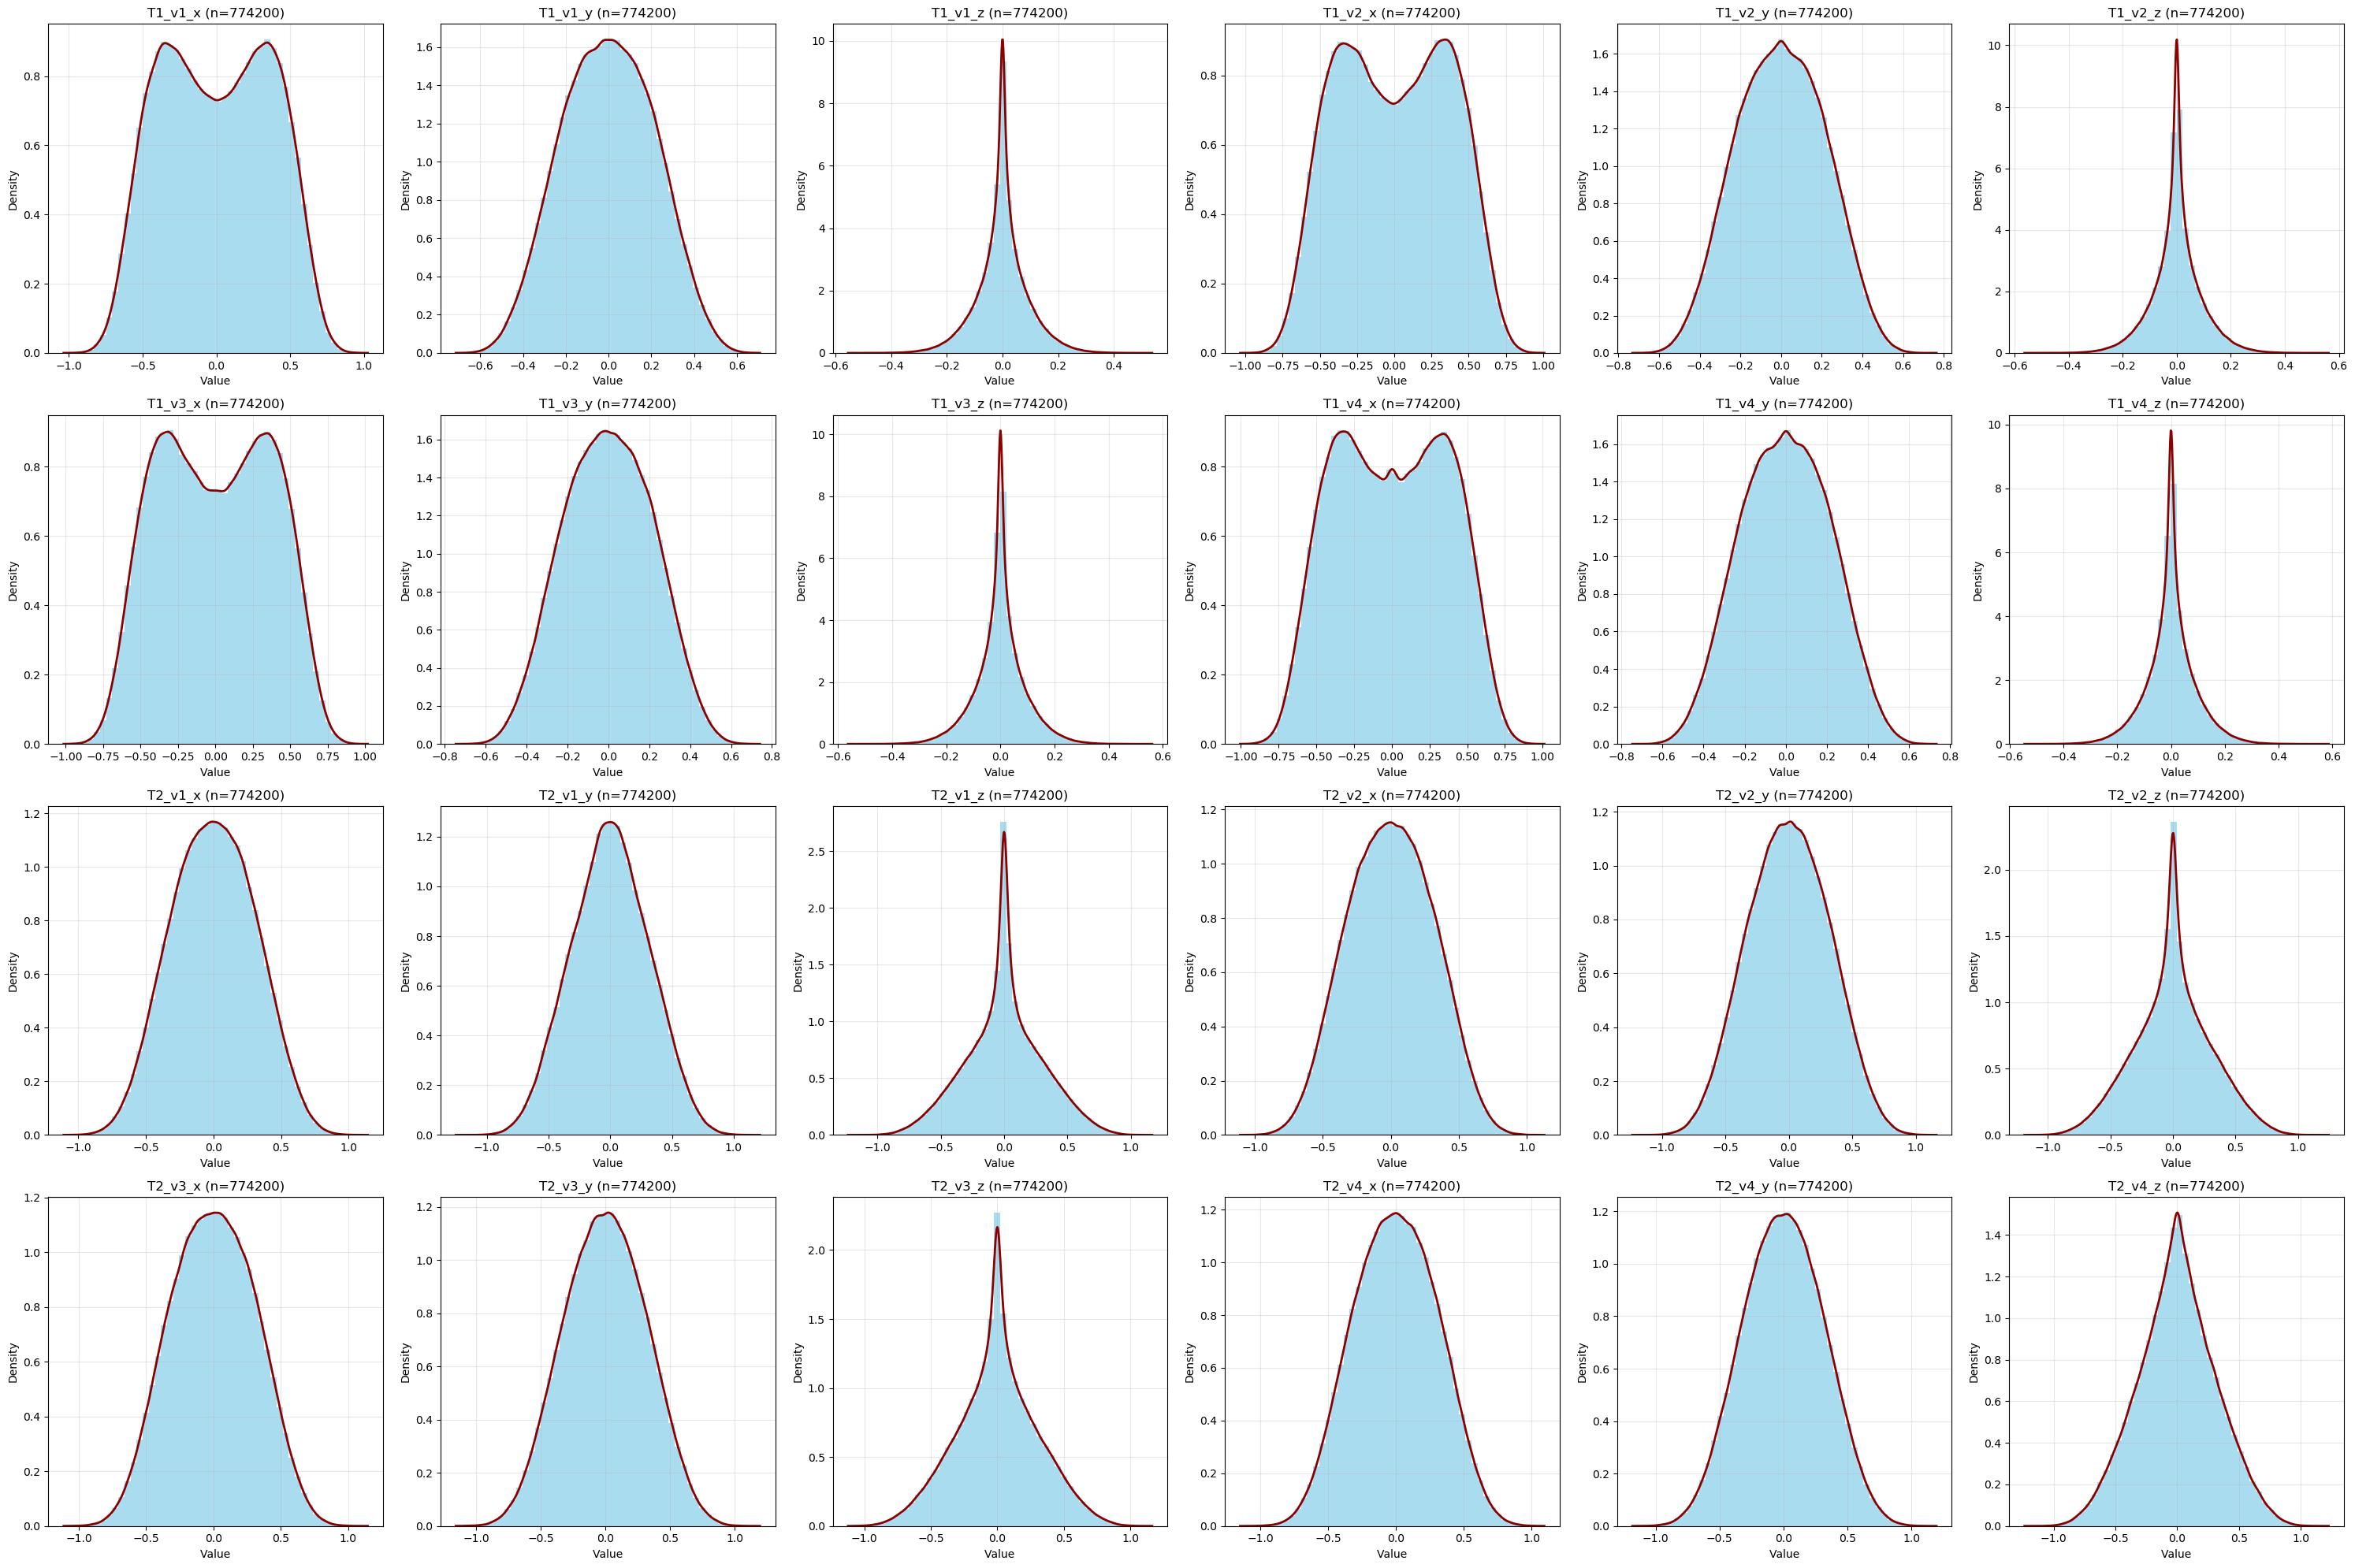

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1']
if has_t2_columns(tetrahedron_dataset):
    tetrahedrons.append('T2')
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Adjust your subplot layout based on number of columns
ncols = min(6, len(columns))
nrows = (len(columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]  # Handle single plot case


for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [7]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []

for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())
    
    if has_t2_columns(tetrahedron_dataset):
        t2_vertices = extract_t2_vertices(row)
        volume = gu.calculate_tetrahedron_volume(t2_vertices)
        t2_volumes.append(volume.item())

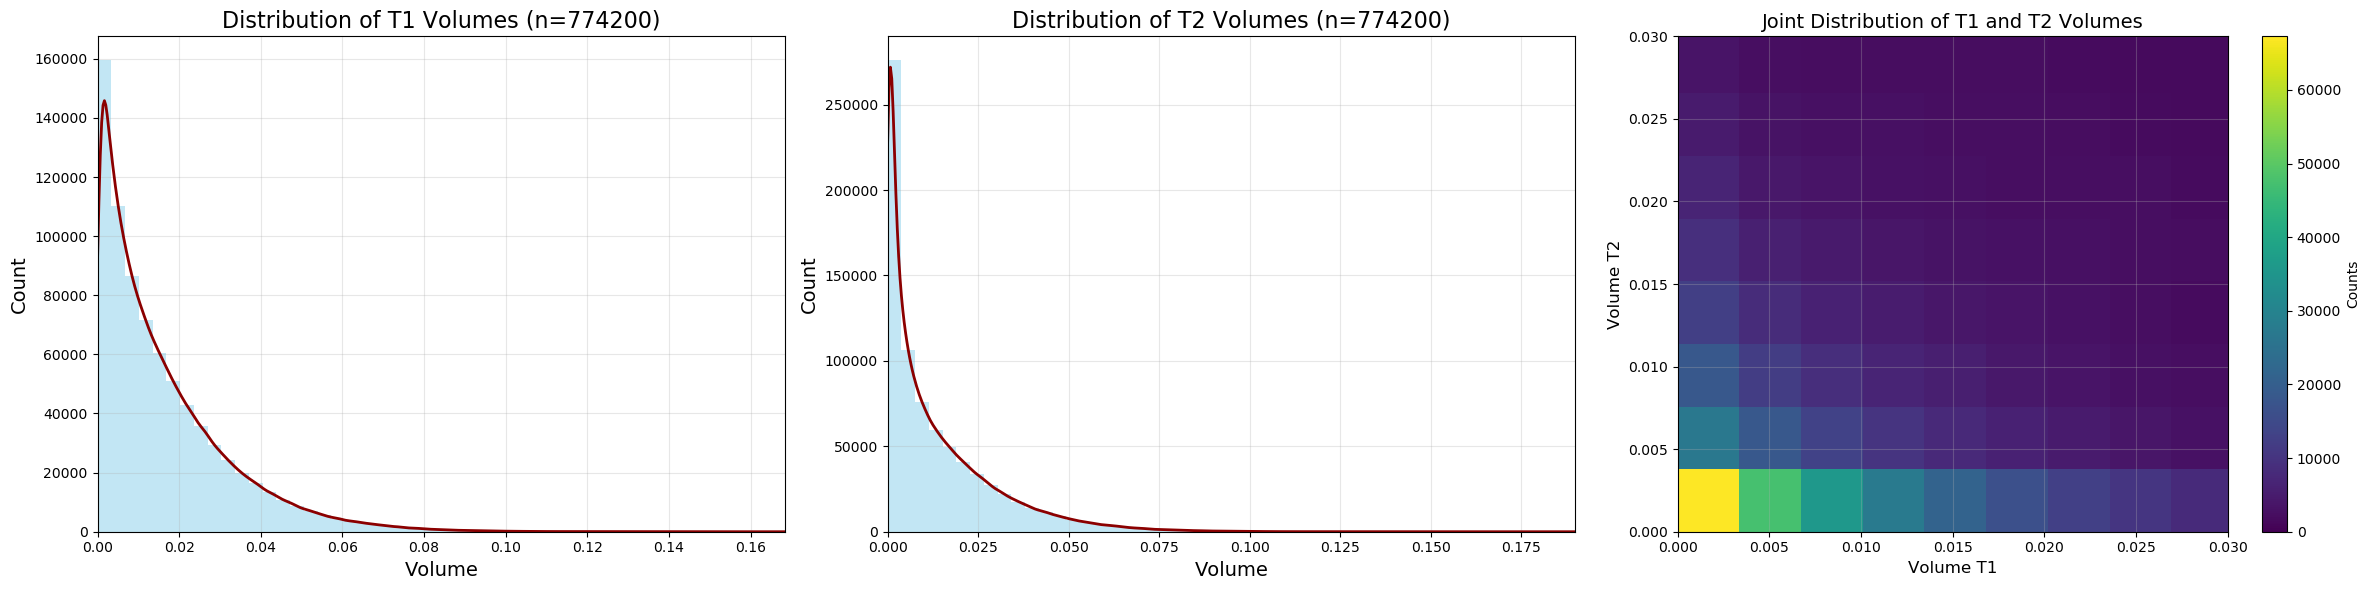

In [8]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

if has_t2_columns(tetrahedron_dataset):
    # Create two subplots (original code)
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

    # Plot for T2
    counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t2)
    x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
    axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
    axes[1].set_xlabel('Volume', fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].set_xlim(0, volumes_t2.max())
    axes[1].grid(True, alpha=0.3)


    # --- Joint Distribution Plot (Manual using np.histogram2d + pcolormesh) ---
    hist2d_bins = 50
    # FIX: Calculate histogram using NumPy directly
    # Avoid density/normed arguments for compatibility
    H, xedges, yedges = np.histogram2d(volumes_t1, volumes_t2, bins=hist2d_bins)

    # Transpose H because pcolormesh expects (Y, X) dimensions
    H = H.T

    X, Y = np.meshgrid(xedges, yedges)
    pcm = axes[2].pcolormesh(X, Y, H, cmap='viridis', shading='auto')
    axes[2].set_title('Joint Distribution of T1 and T2 Volumes', fontsize=14)
    axes[2].set_xlabel('Volume T1', fontsize=12)
    axes[2].set_ylabel('Volume T2', fontsize=12)
    axes[2].set_xlim(0, 0.03) 
    axes[2].set_ylim(0, 0.03) 

    fig.colorbar(pcm, ax=axes[2], label='Counts')
    axes[2].grid(True, alpha=0.3)

else:
    # Create a single plot for T1 only
    fig, ax = plt.subplots(figsize=(10, 6))
    counts, bins, _ = ax.hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(-0.05, 0.015, 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(-0.05, 0.015)
    axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Intersection volume distribution

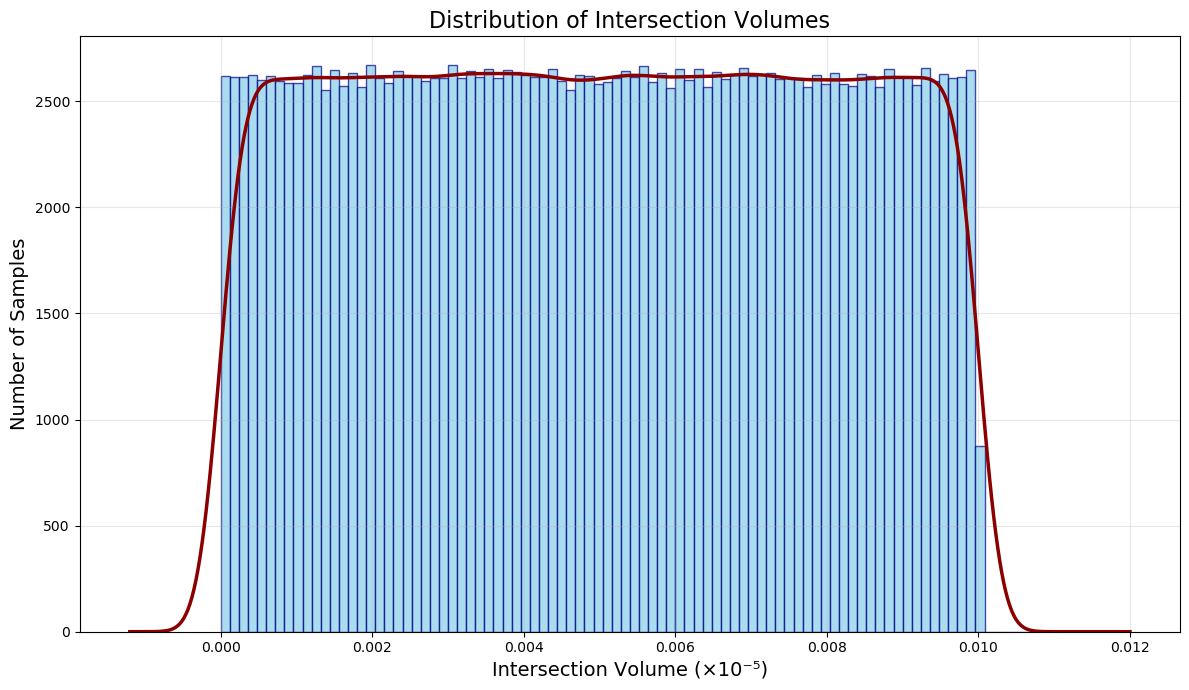

In [9]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]

# Calculate appropriate range from data
scaling_factor = 1000000  # Processing applies a scaling factor of 10^5
volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
max_vol = 0.012
n_bins = 100  # More bins for better resolution

plt.figure(figsize=(12, 7))

# Use actual counts
counts, bins, _ = plt.hist(volumes, 
                           bins=n_bins,
                           range=(0, max_vol),
                           color='skyblue',
                           edgecolor='navy', 
                           alpha=0.7)

# Properly scaled KDE with many more points
kde = gaussian_kde(volumes)
x = np.linspace(-0.0012, max_vol, 500)  # 500 points for smooth curve
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,
         color='darkred', 
         lw=2.5)

plt.title(f'Distribution of Intersection Volumes', fontsize=16)
plt.xlabel(f'Intersection Volume (×10⁻⁵)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()